In [1]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, f1_score
from sklearn import model_selection
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn.metrics import make_scorer
%matplotlib inline

### Loading NBA clean data and salary data into two DataFrames.

In [2]:
stats_df = pd.read_csv('NBA_clean_data.csv')
salary_df = pd.read_csv('Salary_data.csv')
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  552 non-null    object
 1   Salary  536 non-null    object
dtypes: object(2)
memory usage: 8.8+ KB


In [3]:
# Creating a new DataFrame for season 2021.

stats_df_2021 = stats_df.drop(stats_df[stats_df.Year != 2021].index)
stats_df_2021

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER
0,2021,Precious Achiuwa,PF,21.0,MIA,61.0,4.0,737.0,124.0,228.0,...,73.0,135.0,208.0,29.0,20.0,28.0,43.0,91.0,304.0,16.64
1,2021,Steven Adams,C,27.0,NOP,58.0,58.0,1605.0,189.0,308.0,...,213.0,301.0,514.0,111.0,54.0,38.0,78.0,113.0,438.0,17.29
2,2021,Bam Adebayo,C,23.0,MIA,64.0,64.0,2143.0,456.0,800.0,...,142.0,431.0,573.0,346.0,75.0,66.0,169.0,145.0,1197.0,26.39
3,2021,LaMarcus Aldridge,C,35.0,TOT,26.0,23.0,674.0,140.0,296.0,...,19.0,99.0,118.0,49.0,11.0,29.0,27.0,47.0,352.0,18.82
4,2021,Nickeil Alexander-Walker,SG,22.0,NOP,46.0,13.0,1007.0,192.0,458.0,...,13.0,131.0,144.0,102.0,47.0,22.0,69.0,88.0,508.0,15.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2021,Delon Wright,SG-PG,28.0,TOT,63.0,39.0,1748.0,240.0,518.0,...,65.0,204.0,269.0,278.0,101.0,30.0,83.0,75.0,645.0,19.06
435,2021,Thaddeus Young,PF,32.0,CHI,68.0,23.0,1652.0,370.0,662.0,...,168.0,255.0,423.0,291.0,74.0,40.0,137.0,152.0,823.0,23.87
436,2021,Trae Young,PG,22.0,ATL,63.0,63.0,2125.0,487.0,1112.0,...,38.0,207.0,245.0,594.0,53.0,12.0,261.0,111.0,1594.0,27.43
437,2021,Cody Zeller,C,28.0,CHO,48.0,21.0,1005.0,181.0,324.0,...,119.0,209.0,328.0,86.0,27.0,17.0,51.0,121.0,451.0,21.36


In [4]:
# Dropping invalid stats.

salary_df.dropna(inplace=True)
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 0 to 551
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  536 non-null    object
 1   Salary  536 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


### Adding Salary column to stats_df_2021 in order to merge two DataFrames into one.

In [5]:
stats_df_2021['Salary'] = None

for ind in salary_df.index:
    for ind_s in stats_df_2021.index:
        if (salary_df['Player'][ind] == stats_df_2021['Player'][ind_s]):
            stats_df_2021['Salary'][ind_s] = salary_df['Salary'][ind]


<ipython-input-5-b265671d1b3e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df_2021['Salary'][ind_s] = salary_df['Salary'][ind]


In [6]:
stats_df_2021

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Salary
0,2021,Precious Achiuwa,PF,21.0,MIA,61.0,4.0,737.0,124.0,228.0,...,135.0,208.0,29.0,20.0,28.0,43.0,91.0,304.0,16.64,"$2,711,280"
1,2021,Steven Adams,C,27.0,NOP,58.0,58.0,1605.0,189.0,308.0,...,301.0,514.0,111.0,54.0,38.0,78.0,113.0,438.0,17.29,"$17,073,171"
2,2021,Bam Adebayo,C,23.0,MIA,64.0,64.0,2143.0,456.0,800.0,...,431.0,573.0,346.0,75.0,66.0,169.0,145.0,1197.0,26.39,"$28,103,550"
3,2021,LaMarcus Aldridge,C,35.0,TOT,26.0,23.0,674.0,140.0,296.0,...,99.0,118.0,49.0,11.0,29.0,27.0,47.0,352.0,18.82,"$2,641,691"
4,2021,Nickeil Alexander-Walker,SG,22.0,NOP,46.0,13.0,1007.0,192.0,458.0,...,131.0,144.0,102.0,47.0,22.0,69.0,88.0,508.0,15.92,"$3,261,480"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2021,Delon Wright,SG-PG,28.0,TOT,63.0,39.0,1748.0,240.0,518.0,...,204.0,269.0,278.0,101.0,30.0,83.0,75.0,645.0,19.06,"$8,526,316"
435,2021,Thaddeus Young,PF,32.0,CHI,68.0,23.0,1652.0,370.0,662.0,...,255.0,423.0,291.0,74.0,40.0,137.0,152.0,823.0,23.87,"$14,190,000"
436,2021,Trae Young,PG,22.0,ATL,63.0,63.0,2125.0,487.0,1112.0,...,207.0,245.0,594.0,53.0,12.0,261.0,111.0,1594.0,27.43,"$8,326,471"
437,2021,Cody Zeller,C,28.0,CHO,48.0,21.0,1005.0,181.0,324.0,...,209.0,328.0,86.0,27.0,17.0,51.0,121.0,451.0,21.36,"$2,389,641"


In [7]:
# Deleting '$' and ',' to convert the column to numeric.

stats_df_2021['Salary'] = stats_df_2021['Salary'].str.replace(('\$|\,'), '', regex=True)

In [8]:
# Again dropping invalid stats.
# Converting Salary column to 'int64'.

stats_df_2021.dropna(inplace=True)
stats_df_2021.reset_index(drop=True, inplace=True)
stats_df_2021['Salary'] = stats_df_2021['Salary'].astype('int64')

In [9]:
stats_df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    376 non-null    int64  
 1   Player  376 non-null    object 
 2   Pos     376 non-null    object 
 3   Age     376 non-null    float64
 4   Tm      376 non-null    object 
 5   G       376 non-null    float64
 6   GS      376 non-null    float64
 7   MP      376 non-null    float64
 8   FG      376 non-null    float64
 9   FGA     376 non-null    float64
 10  FG%     376 non-null    float64
 11  3P      376 non-null    float64
 12  3PA     376 non-null    float64
 13  3P%     376 non-null    float64
 14  2P      376 non-null    float64
 15  2PA     376 non-null    float64
 16  2P%     376 non-null    float64
 17  eFG%    376 non-null    float64
 18  FT      376 non-null    float64
 19  FTA     376 non-null    float64
 20  FT%     376 non-null    float64
 21  ORB     376 non-null    float64
 22  DR

Text(0, 0.5, 'PER')

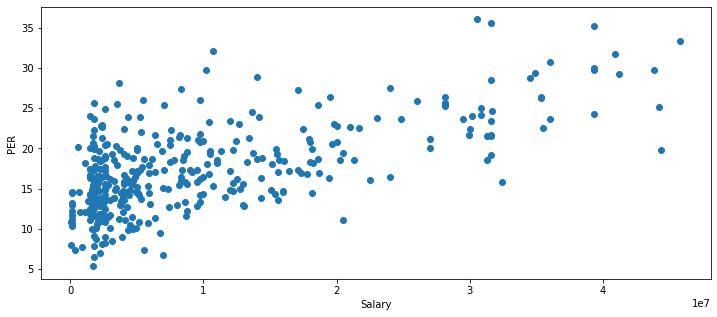

In [10]:
# Displaying the correlation between Salary column and PER column.

plt.figure(figsize=(12,5))
plt.scatter(stats_df_2021['Salary'], stats_df_2021['PER'])
plt.xlabel('Salary')
plt.ylabel('PER')

In [11]:
correlation = stats_df_2021['Salary'].corr(stats_df_2021['PER'])
correlation

0.6352744078674952

### As we can see, the correlation between these columns is quite positive. Which means that there is some connection between each player's PER and his salary.

In [12]:
# Players that make more than 30 million a year, are considered outliers(They are rare). So we drop them.

stats_df_2021 = stats_df_2021.drop(stats_df_2021[stats_df_2021.Salary > 30000000].index)
stats_df_2021.reset_index(drop=True, inplace=True)
stats_df_2021

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Salary
0,2021,Precious Achiuwa,PF,21.0,MIA,61.0,4.0,737.0,124.0,228.0,...,135.0,208.0,29.0,20.0,28.0,43.0,91.0,304.0,16.64,2711280
1,2021,Steven Adams,C,27.0,NOP,58.0,58.0,1605.0,189.0,308.0,...,301.0,514.0,111.0,54.0,38.0,78.0,113.0,438.0,17.29,17073171
2,2021,Bam Adebayo,C,23.0,MIA,64.0,64.0,2143.0,456.0,800.0,...,431.0,573.0,346.0,75.0,66.0,169.0,145.0,1197.0,26.39,28103550
3,2021,LaMarcus Aldridge,C,35.0,TOT,26.0,23.0,674.0,140.0,296.0,...,99.0,118.0,49.0,11.0,29.0,27.0,47.0,352.0,18.82,2641691
4,2021,Nickeil Alexander-Walker,SG,22.0,NOP,46.0,13.0,1007.0,192.0,458.0,...,131.0,144.0,102.0,47.0,22.0,69.0,88.0,508.0,15.92,3261480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,2021,Delon Wright,SG-PG,28.0,TOT,63.0,39.0,1748.0,240.0,518.0,...,204.0,269.0,278.0,101.0,30.0,83.0,75.0,645.0,19.06,8526316
340,2021,Thaddeus Young,PF,32.0,CHI,68.0,23.0,1652.0,370.0,662.0,...,255.0,423.0,291.0,74.0,40.0,137.0,152.0,823.0,23.87,14190000
341,2021,Trae Young,PG,22.0,ATL,63.0,63.0,2125.0,487.0,1112.0,...,207.0,245.0,594.0,53.0,12.0,261.0,111.0,1594.0,27.43,8326471
342,2021,Cody Zeller,C,28.0,CHO,48.0,21.0,1005.0,181.0,324.0,...,209.0,328.0,86.0,27.0,17.0,51.0,121.0,451.0,21.36,2389641


### Machine Learning.

In [13]:
# Splitting the data to train and test.

X_train, X_test, y_train, y_test = train_test_split(stats_df_2021.drop(["Player", "Year", "Pos", "Tm", "Salary","FG%", "3P%", "2P%",
                                                                       "eFG%", "FT%"],axis=1)
                                                                       , stats_df_2021["Salary"], random_state=42, test_size=0.2)

In [14]:
# Training a LinearRegression model.

clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [15]:
# Prediction.

y_pred = clf.predict(X_test)

In [16]:
# Evaluation with r2 score.

score = metrics.r2_score(y_test, y_pred)
score

0.5030999161361256

### The score we got is 52%, which is ok. It means that we can predict a player's Salary according to his stats, but it won't be highly accurate.